In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import TimeContinuousMarkovChainQueueModel
import seaborn as sns

In [8]:
producer_lambda = 100
consumer_lambda = 500
queue_size = 100
discrete_time_step = 1e-4

In [9]:
queue_model = TimeContinuousMarkovChainQueueModel(
    producer_lambda=producer_lambda,
    consumer_lambda=consumer_lambda,
    size=queue_size,
    time_step=discrete_time_step
)

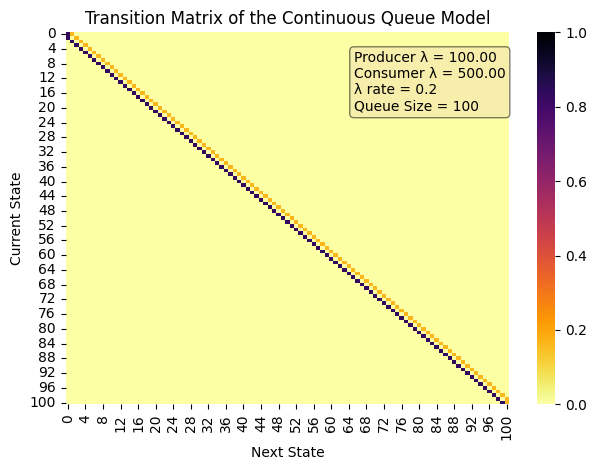

In [10]:
fig, ax = plt.subplots()
sns.heatmap(queue_model.transition_matrix,
            annot=False,
            cmap='inferno_r',
            fmt=".2f",
            ax=ax,
            vmin=0, vmax=1)
ax.set_title('Transition Matrix of the Continuous Queue Model')
textstr = (
    f'Producer λ = {queue_model.producer_lambda:.2f}\n'
    f'Consumer λ = {queue_model.consumer_lambda:.2f}\n'
    f'λ rate = {queue_model.lambda_rate}\n'
    f'Queue Size = {queue_model.size}'
)
ax.text(0.65, 0.95,
        textstr,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(
            boxstyle='round', facecolor='wheat', alpha=0.5
        ))
ax.set_ylabel('Current State')
ax.set_xlabel('Next State')
fig.tight_layout()

/home/lucasbanunes/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/lucasbanunes/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


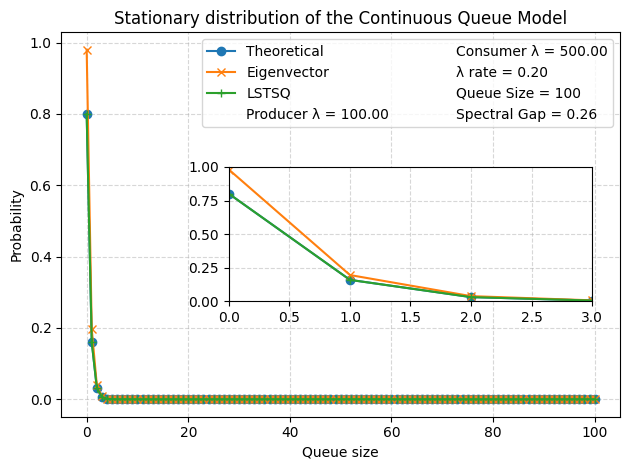

In [11]:
def plot_ax(ax):
    ax.grid(linestyle='--', alpha=.5)
    ax.plot(queue_model.stationary_distribution, marker='o', label='Theoretical')
    ax.plot(queue_model.eigenvalues_report.stationary_distribution, marker='x', label='Eigenvector')
    ax.plot(queue_model.lstsq_report.stationary_distribution, marker='+', label='LSTSQ')

fig, ax = plt.subplots()
plot_ax(ax)
ax.plot([], [], ' ', label=f'Producer λ = {queue_model.producer_lambda:.2f}')
ax.plot([], [], ' ', label=f'Consumer λ = {queue_model.consumer_lambda:.2f}')
ax.plot([], [], ' ', label=f'λ rate = {queue_model.lambda_rate:.2f}')
ax.plot([], [], ' ', label=f'Queue Size = {queue_model.size}')
ax.plot([], [], ' ', label=f'Spectral Gap = {queue_model.eigenvalues_report.spectral_gap:.2f}')
zoom_ax = ax.inset_axes(
    [.3, 0.3, .65, 0.35],
    xlim=(0, 3), ylim=(0, 1)
)
plot_ax(zoom_ax)
ax.set(
    xlabel='Queue size',
    ylabel='Probability',
    title='Stationary distribution of the Continuous Queue Model',
)
ax.legend(ncol=2)
fig.tight_layout()

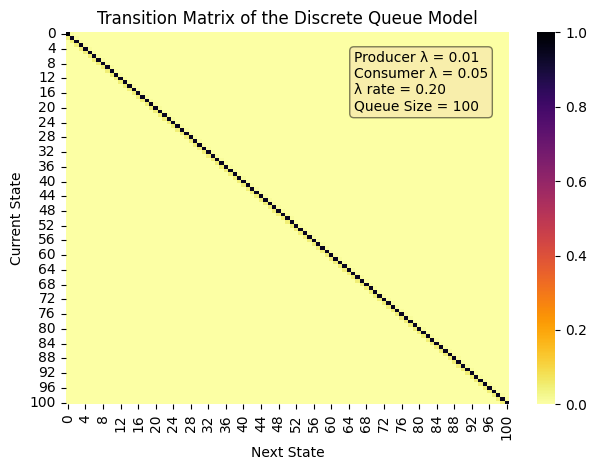

In [12]:
plot_model = queue_model.discrete
fig, ax = plt.subplots()
sns.heatmap(plot_model.transition_matrix,
            annot=False,
            cmap='inferno_r',
            fmt=".2f",
            ax=ax,
            vmin=0, vmax=1)
ax.set_title('Transition Matrix of the Discrete Queue Model')
textstr = (
    f'Producer λ = {plot_model.producer_lambda:.2f}\n'
    f'Consumer λ = {plot_model.consumer_lambda:.2f}\n'
    f'λ rate = {plot_model.lambda_rate:.2f}\n'
    f'Queue Size = {plot_model.size}'
)
ax.text(0.65, 0.95,
        textstr,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(
            boxstyle='round', facecolor='wheat', alpha=0.5
        ))
ax.set_ylabel('Current State')
ax.set_xlabel('Next State')
fig.tight_layout()

/home/lucasbanunes/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/lucasbanunes/.local/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


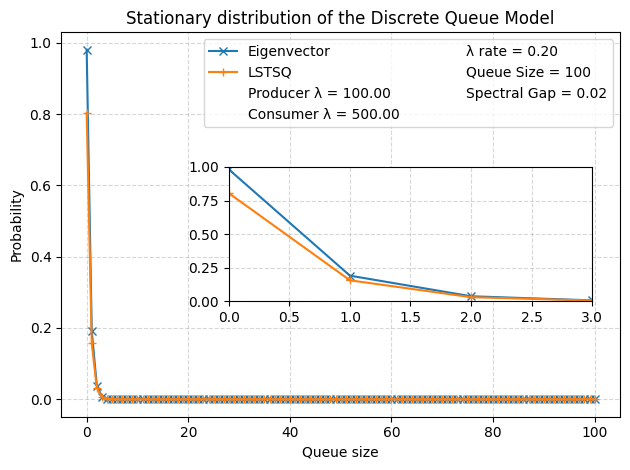

In [13]:
def plot_ax(ax, model):
    ax.grid(linestyle='--', alpha=.5)
    ax.plot(model.eigenvalues_report.stationary_distribution, marker='x', label='Eigenvector')
    ax.plot(model.lstsq_report.stationary_distribution, marker='+', label='LSTSQ')

fig, ax = plt.subplots()
plot_ax(ax, queue_model.discrete)
ax.plot([], [], ' ', label=f'Producer λ = {queue_model.producer_lambda:.2f}')
ax.plot([], [], ' ', label=f'Consumer λ = {queue_model.consumer_lambda:.2f}')
ax.plot([], [], ' ', label=f'λ rate = {queue_model.lambda_rate:.2f}')
ax.plot([], [], ' ', label=f'Queue Size = {queue_model.size}')
ax.plot([], [], ' ', label=f'Spectral Gap = {queue_model.discrete.eigenvalues_report.spectral_gap:.2f}')
zoom_ax = ax.inset_axes(
    [.3, 0.3, .65, 0.35],
    xlim=(0, 3), ylim=(0, 1)
)
plot_ax(zoom_ax, queue_model.discrete)
ax.set(
    xlabel='Queue size',
    ylabel='Probability',
    title='Stationary distribution of the Discrete Queue Model',
)
ax.legend(ncol=2)
fig.tight_layout()